# GRU 활용 텍스트 분석

> imdb 영화 리뷰 데이터셋(영문)

## #01. 준비작업

### [1] 패키지 참조


In [1]:
from hossam.colab import *
init(package=True, mecab=True)

Initializing...
----------------------------------------------------------------------------------------------------
nanum font installation start!!!
nanum font installation success!!!
----------------------------------------------------------------------------------------------------
package installation start!!!
[1/7] pca package install success
[2/7] pingouin package install success
[3/7] statannotations package install success
[4/7] pycallgraphix package install success
[5/7] keras-tuner package install success
[6/7] contractions package install success
[7/7] nltk package install success
package installation success!!!
----------------------------------------------------------------------------------------------------
mecab installation start!!!
[1/2] Clone Mecab-ko-for-Google-Colab from github
[2/2] Install Mecab-ko-for-Google-Colab
mecab installation success!!!
----------------------------------------------------------------------------------------------------
Initialization comp

True

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings(action="ignore")

from hossam.util import *
from hossam.plot import *
from hossam.tensor import *

### [2] 데이터 가져오기

Tensorflow에 내장된 데이터가 있지만, 동일 데이터를 미리 엑셀로 저장 두었다.


In [ ]:
origin = my_read_excel(
    path="https://data.hossam.kr/tmdata/imdb.xlsx", 
    categories=["sentiment"], 
    info = False
)


상위 5개 행
+----+-------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## #02. 데이터 전처리

### [1] 종속변수 라벨링


In [3]:
df = my_labelling(origin, "sentiment")
my_pretty_table(df.head(10))

+-------------+---------+
| sentiment   |   label |
|-------------+---------|
| negative    |       0 |
| positive    |       1 |
+-------------+---------+
+----+-------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### [2] 문자열 전처리

* 축약형 문자열 처리
* 이메일 주소 제거
* HTML 태그 제거
* URL 제거
* 숫자 제거
* 특수문자 제거
* 불용어 제거

#### (1) 영어 불용어 목록


In [4]:
stopwords = my_stopwords("en")
stopwords[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

#### (2) 전처리 수행


In [5]:
%%time

df2 = my_text_data_preprocessing(df, "review", 
    rm_abbr=True, rm_email=True, rm_html=True, rm_url=True, rm_num = True, 
    rm_special=True, stopwords=stopwords)
my_pretty_table(df2.head(10))

+----+-------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### [3] 문자열 토큰화 및 패딩

In [6]:
%%time

df3, token_set, vocab_size = my_token_process(df2, xname='review', yname='sentiment', 
                                        threshold=30, max_word_count=None)

print("vocab_size:", vocab_size)

max_word_count = df3['count'].max()
print("max_word_count:", max_word_count)

df3

단어 집합(vocabulary)의 크기 : 216418
등장 빈도가 30번 미만인 희귀 단어의 수: 201100
단어 집합에서 희귀 단어의 비율: 92.92203051502186
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 8.597505256648489
단어 집합의 크기 : 15319
독립변수(텍스트) 데이터 수:  49998
종속변수(레이블) 데이터 수:  49998
vocab_size: 15319
max_word_count: 1508
CPU times: user 23.6 s, sys: 1.66 s, total: 25.2 s
Wall time: 25.4 s


,sentiment,text,count,token,pad_token
0,1,One reviewers mentioned watching Oz episode ho...,181,"[7, 1855, 991, 76, 3228, 322, 3066, 71, 124, 5...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,A wonderful little production The filming tech...,94,"[53, 315, 51, 289, 4, 1277, 2901, 1, 1, 1545, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1,I thought wonderful way spend time hot summer ...,93,"[2, 114, 315, 35, 1037, 14, 828, 1398, 2392, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0,Basically there is family little boy Jake thin...,72,"[615, 26, 8, 157, 51, 368, 3518, 1117, 26, 8, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1,Petter Matteis Love Time Money visually stunni...,130,"[1, 1, 47, 14, 216, 2067, 1292, 5, 39, 379, 11...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
49993,1,I thought movie right good job It creative ori...,98,"[2, 114, 3, 124, 11, 217, 6, 1391, 125, 27, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
49994,0,Bad plot bad dialogue bad acting idiotic direc...,62,"[22, 49, 22, 336, 22, 48, 2899, 892, 558, 1475...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
49995,0,I Catholic taught parochial elementary schools...,122,"[2, 3437, 4166, 1, 8213, 4417, 8662, 4166, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
49996,0,I am going disagree previous comment side Malt...,120,"[2, 64, 80, 2897, 814, 845, 430, 11388, 7, 10,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## #04. 학습 모형 적합

### [2] 데이터 분할


In [7]:
x_train, x_test, y_train, y_test = my_train_test_split(data=token_set, 
                                                       ydata=df3['sentiment'])

print(
    "훈련용 데이터셋 크기: %s, 검증용 데이터셋 크기: %s" % (x_train.shape, x_test.shape)
)
print("훈련용 레이블 크기: %s, 검증용 레이블 크기: %s" % (y_train.shape, y_test.shape))

훈련용 데이터셋 크기: (39998, 1508), 검증용 데이터셋 크기: (10000, 1508)
훈련용 레이블 크기: (39998,), 검증용 레이블 크기: (10000,)


### [3] 모델 생성


{'type': 'embedding', 'input_dim': 15319, 'output_dim': 32, 'input_length': 1508}
{'type': 'gru', 'units': 32}
{'type': 'dense', 'units': 1, 'activation': 'sigmoid'}


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]


Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Restoring model weights from the end of the best epoch: 1.

Epoch 11: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 11: early stopping
313/313 [==============================] - 38s 122ms/step - loss: 0.2706 - acc: 0.8911
+-------+----------+----------+
|       |     loss |      acc |
|-------+----------+----------|
| train | 0.179343 | 0.936022 |
| test  | 0.270616 |   0.8911 |
+-------+----------+----------+


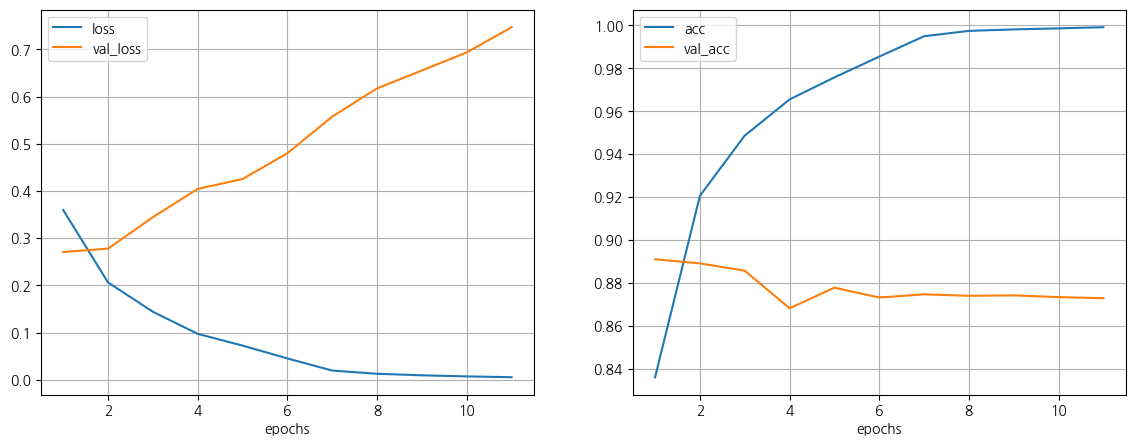

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1508, 32)          490208    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 496577 (1.89 MB)
Trainable params: 496577 (1.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
CPU times: user 4h 57min 23s, sys: 3min 35s, total: 5h 58s
Wall time: 3h 12min 29s


In [8]:
%%time

# model = Sequential()

# model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))
# # 딱 한 층만 쌓아야 한다.(Dog꿀~!!)
# model.add(GRU(32))
# model.add(Dense(1, activation='sigmoid'))

# # 결국은 긍정, 부정을 분류 하는 문제이므로 이진분류에 해당한다.
# model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['acc'])
# model.summary()

model = my_tf(
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    layer=[
        dict(type="embedding", input_dim=vocab_size, output_dim=32, 
            input_length=max_word_count),
        dict(type="gru", units=32),
        dict(type="dense", units=1, activation="sigmoid")
    ],
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["acc"]
)

model.summary()

## #06. 학습 결과 적용

### [1] 검증 데이터에 대한 예측 결과 산정


In [9]:
result = model.predict(x_test)
data_count, case_count = result.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
result

313/313 [==============================] - 39s 122ms/step
10000개의 검증 데이터가 1개의 경우의 수를 갖는다.


array([[0.944419  ],
       [0.04769487],
       [0.9885031 ],
       ...,
       [0.0537191 ],
       [0.02555574],
       [0.06174482]], dtype=float32)

### [2] 예측 결과를 1차원 배열로 변환


In [10]:
f_results = result.flatten()
f_results = np.round(f_results, 0)
f_results

array([1., 0., 1., ..., 0., 0., 0.], dtype=float32)

### [3] 오차행렬


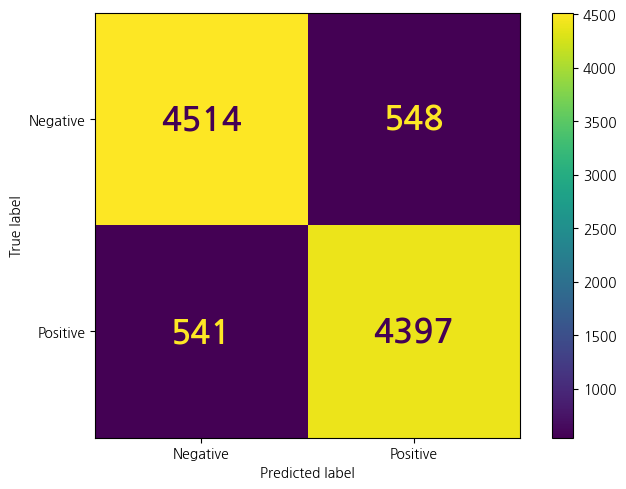

In [11]:
my_confusion_matrix(y=y_test, y_pred=f_results, figsize=(7, 5))

## #07. 학습 결과 활용

### [1] 임의의 문장


In [12]:
review = [
    "I had a lot of fun watching it.",
    "I didn't notice how time passed.",
    "I was happy the whole time I watched it.",
    "worst movie",
    "such a boring movie",
]

### [2] 문자열 전처리


In [13]:
review_pre = [my_text_preprocessing(x, stopwords=stopwords) for x in review]
review_pre

['I lot fun watching it',
 'I notice time passed',
 'I happy whole time I watched it',
 'worst movie',
 'boring movie']

### [3] 토큰화 + 패딩


In [14]:
_, token_set, _ = my_token_process(data=review_pre, num_words=vocab_size, 
                                   max_word_count=max_word_count)
token_set

단어 집합(vocabulary)의 크기 : 15
등장 빈도가 10번 미만인 희귀 단어의 수: 14
단어 집합에서 희귀 단어의 비율: 93.33333333333333
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 100.0
단어 집합의 크기 : 2
독립변수(텍스트) 데이터 수:  5


array([[ 0,  0,  0, ...,  7,  8,  3],
       [ 0,  0,  0, ...,  9,  4, 10],
       [ 0,  0,  0, ...,  2, 13,  3],
       [ 0,  0,  0, ...,  0, 14,  5],
       [ 0,  0,  0, ...,  0, 15,  5]], dtype=int32)

### [5] 예측값 생성


In [15]:
f_results = model.predict(token_set)
data_count, case_count = f_results.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
f_results

1/1 [==============================] - 0s 189ms/step
5개의 검증 데이터가 1개의 경우의 수를 갖는다.


array([[0.53501487],
       [0.4394266 ],
       [0.40694043],
       [0.48854408],
       [0.46739554]], dtype=float32)

### [6] 결과 판정


In [16]:
f_results = np.round(f_results.flatten(), 0)

for i, v in enumerate(review):
    k = "긍정" if f_results[i] == 1 else "부정"
    print(f"[{k}] {v}")

[긍정] I had a lot of fun watching it.
[부정] I didn't notice how time passed.
[부정] I was happy the whole time I watched it.
[부정] worst movie
[부정] such a boring movie
